# 感知机算法

## 基本形式

我们想学习一个超平面用来**正确**分割数据集到正负两种类别。感知机算法为错误例驱动。

$ T = \{(x_1, y_1), (x_2, y_2), ..., (x_N, y_N)\}, x \in R^N, y \in \{-1, +1\} $  

$\widetilde{y} = sign(W\cdot x + b) $  

$loss = \sum_{i\in M}y_i(W\cdot x_i+b)$

伪码：
1. 初始化 $W, b$
2. 遍历所有数据，对于每个数据 $(x_i, y_i)$，如果 $y_i(W\cdot{x_i}+b)\le0$，则更新数据，否则继续遍历。  
$W = W + \eta y_i x_i $  
$b = b + \eta y_i $
3. 当所有数据都被正确分类，或者达到最大循环次数时，停止。
    

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Perceptron:
    def __init__(self, lr=1, max_iter=1000):
        self.lr = lr
        self.max_iter = max_iter
        self.W = None
        self.b = None
    
    def fit(self, X, y):
        count, terminate = 0, False
        self.W, self.b = np.zeros(X.shape[1]), 0
        while True:
            terminate = True
            for i, x in enumerate(X):
                count += 1
                if count >= self.max_iter:
                    terminate = True
                    break
                yp = np.dot(self.W, x) + self.b
                if yp*y[i] <= 0:
                    self.W = self.W + self.lr*y[i]*x
                    self.b = self.b + self.lr*y[i]
                    terminate = False
                else:
                    continue
            if terminate:
                break
        print(f'model is trained for {count} iterations')
    
    def predict(self, x):
        return np.dot(self.W, x) + self.b

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
X, y = iris.data, iris.target
# select only two classes
X = X[(y == 0) | (y == 1)]
y = y[(y == 0) | (y == 1)]
# select only two features for illussion purpose
X = X[:, 0:3:2]
# convert y values into {-1, +1}
y = np.array([1 if x==1 else -1 for x in y])

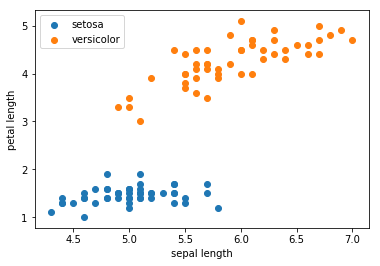

In [6]:
plt.scatter(X[y==-1][:, 0], X[y==-1][:, 1], label='setosa')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend()

In [7]:
model = Perceptron()
model.fit(X, y)

model is trained for 600 iterations


In [8]:
points_x = np.linspace(3, 8, 100)
points_y = -(model.W[0]*points_x + model.b)/model.W[1]

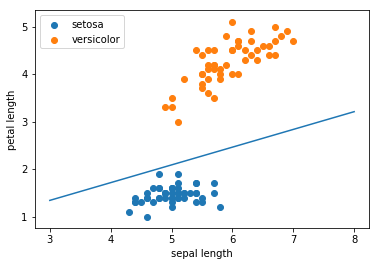

In [9]:
plt.plot(points_x, points_y)
plt.scatter(X[y==-1][:, 0], X[y==-1][:, 1], label='setosa')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend()